# <center>ASTR4004/8004 - Neural Networks - Part 5</center>

This notebook builds a Generative Adversarial Network to generate handwritten digits.

We will train the network using handwritten digits from the Modified National Institute of Standards and Technology database (i.e., [MNIST dataset](http://yann.lecun.com/exdb/mnist/)), and construct the following architecture for our network

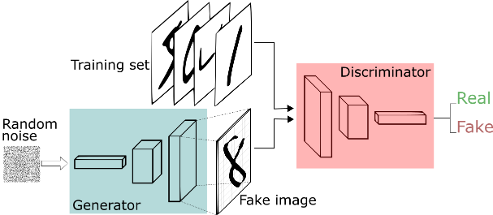

## Useful packages

In [ ]:
# Let's work within our working directory, e.g., where MNIST data is stored
import os
os.chdir('/home/563/yq5547/notebooks/ASTR4004')

# We need numpy to handle data and array
import numpy as np

# We need matplotlib.pyplot to make plots
import matplotlib.pyplot as plt

# tensorflow and its keras API provide a NN framework
import tensorflow as tf
# Set the number of threads for intra and inter operations
tf.config.threading.set_intra_op_parallelism_threads(52)  # Set to your desired number
tf.config.threading.set_inter_op_parallelism_threads(52)

from tensorflow.keras import layers, models, optimizers, Model

# set hyperparameters at the beginning
l_rate = 1e-4
Nepoch = 100
batch_size = 64

## Dataset preparation
MNIST contains 70,000 images of handwritten digits, in greyscale with pixel-values from 0 to 255. Let us first load the data. I have store them in two seperated numpy files. But we only need the images here. Label is not needed.

In [ ]:
# load data
images = np.load('./MNIST_images.npy', allow_pickle=True)

# it is normally a good practice to rescale the training data into [0, 1] or [-1, 1]
images = (images - np.min(images)) / (np.max(images) - np.min(images))

# flatten images into 1D array
x = images.reshape([len(images), -1])

### Let's divide the sample into training (90%) and test (10%) 

In [ ]:
train_size = int(0.9 * len(x)) # tensorflow can split some from training set for validation
test_size = len(x) - train_size

x_train, x_test = x[:train_size], x[test_size:]
images_test = images[test_size:]

print("Training data: {}".format(x_train.shape))
print("Test data: {}".format(x_test.shape))

### It is often a good practice to reshuffle the training set to get rid of any existing pattern in the data

In [ ]:
shuffle_index = np.random.permutation(train_size)
x_train = x_train[shuffle_index]
shuffle_index = np.random.permutation(test_size)
x_test = x_test[shuffle_index]
images_test = images_test[shuffle_index]

## Network definition

### Generator

In [ ]:
z_dim = 100
generator = models.Sequential([
...
])

Use the (untrained) generator to create an image.

In [ ]:
# Visualize generated images
noise = tf.random.normal([10, 100])
generated_images = generator(noise, training=False)
plt.figure(figsize=(5, 2))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow((generated_images[i].numpy().reshape([28,28]) + 1) / 2, cmap='gray')  # Scale to [0, 1]
    plt.axis('off')
plt.subplots_adjust(wspace=0.02,hspace=0.02)

### Discriminator

In [ ]:
discriminator = models.Sequential([
...
])

Use the (untrained) discriminator to classify the generated and real images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.

In [ ]:
print(discriminator(generated_images)), print(discriminator(x_test[:10]))

## Loss functions

In [ ]:
# Loss function
BCE = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### discriminator loss
The binary cross entropy loss function compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [ ]:
def discriminator_loss(real_output, fake_output):
    ...

### generator loss
The generator aims to trick the discriminator. Therefore, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Therefore, the binary cross entropy loss function here compares the discriminators decisions on the generated images to an array of 1s.

In [ ]:
def generator_loss(fake_output):
    ...

## Optimizers

In [ ]:
# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(l_rate)
discriminator_optimizer = tf.keras.optimizers.Adam(l_rate)

## Network training

In [ ]:
generator_losses = np.zeros(Nepoch)
discriminator_losses = np.zeros(Nepoch)
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

for epoch in range(Nepoch):
    
    for real_images in train_dataset:
        noise = tf.random.normal([batch_size, z_dim])

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = ...
    
            real_output = ...
            fake_output = ...
    
            gen_loss  = ...
            disc_loss = ...
    
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
        
    generator_losses[epoch] = gen_loss.numpy()
    discriminator_losses[epoch] = disc_loss.numpy()

    # Visualize generated images to see the training progress
    if epoch%10 == 0:    
        print(f'Epoch {epoch+1}/{Nepoch}, Loss: {generator_losses[epoch]:.2f}(G), {discriminator_losses[epoch]:.2f}(D)')

        noise = tf.random.normal([10, 100])
        generated_images = generator(noise, training=False)
        plt.figure(figsize=(5, 2))
        for i in range(10):
            plt.subplot(2, 5, i + 1)
            plt.imshow((generated_images[i].numpy().reshape([28,28]) + 1) / 2, cmap='gray')  # Scale to [0, 1]
            plt.axis('off')
        plt.subplots_adjust(wspace=0.02,hspace=0.02)

In [ ]:
## plot the loss
plt.plot(generator_losses, 'r-')
plt.plot(discriminator_losses, 'b-')